In [185]:
%matplotlib inline

import os
import tempfile
from enum import IntEnum
from collections import namedtuple

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use('bmh')
sns.set()

In [135]:
import glob
import pickle

In [203]:
class SwfFields(IntEnum):
    JOB_ID = 0
    SUBMITTED = 1
    WAIT_TIME = 2
    EXEC_TIME = 3
    ALLOC_PROCS = 4
    AVG_CPU_USAGE = 5
    USED_MEM = 6
    REQ_PROCS = 7
    REQ_TIME = 8
    REQ_MEM = 9
    STATUS = 10
    USER_ID = 11
    GROUP_ID = 12
    EXECUTABLE = 13
    QUEUE_NUM = 14
    PART_NUM = 15
    PRECEDING_JOB = 16
    THINK_TIME = 17

flint = lambda x: int(float(x))    

CONVERTERS = {key: flint if key != SwfFields.AVG_CPU_USAGE else float
              for key in SwfFields}

Job = namedtuple(
    'Job', (
        'id submission_time execution_time procs cpu mem req_procs req_time req_mem '
        'status user_id group_id executable queue_num part_num preceding_job think_time wait_time'
    ).split()
)

def parse(filename):
    with open(filename, 'r') as fp:
        for line in fp:
            if ';' in line:
                continue
            fields = line.strip().split()
            if len(fields) == 19:
                del fields[6]
            fields = [CONVERTERS[SwfFields(i)](f) for i, f in enumerate(fields)]

            job = Job(
                fields[SwfFields.JOB_ID],
                fields[SwfFields.SUBMITTED],
                fields[SwfFields.EXEC_TIME],
                fields[SwfFields.ALLOC_PROCS],
                fields[SwfFields.AVG_CPU_USAGE],
                fields[SwfFields.USED_MEM],
                fields[SwfFields.REQ_PROCS],
                fields[SwfFields.REQ_TIME],
                fields[SwfFields.REQ_MEM],
                fields[SwfFields.STATUS],
                fields[SwfFields.USER_ID],
                fields[SwfFields.GROUP_ID],
                fields[SwfFields.EXECUTABLE],
                fields[SwfFields.QUEUE_NUM],
                fields[SwfFields.PART_NUM],
                fields[SwfFields.PRECEDING_JOB],
                fields[SwfFields.THINK_TIME],
                fields[SwfFields.WAIT_TIME]
            )

            yield job

def swf_to_df(fn):
    df = pd.DataFrame(data=parse(fn))
    df.index = df['id']
    return df

In [204]:
idx = 0
pickles = glob.glob('*swf.pkl')

In [205]:
with open(pickles[idx], 'rb') as fp:
    stats, jobs = pickle.load(fp)

In [227]:
tmp = tempfile.NamedTemporaryFile(mode='w', delete=False)
print(tmp.name)
tmp.write('\n'.join(jobs))
tmp.close()
out_swf = swf_to_df(tmp.name).iloc[5000:-5000]
os.unlink(tmp.name)
out_swf

/tmp/tmpvj8_aoif


,id,submission_time,execution_time,procs,cpu,mem,req_procs,req_time,req_mem,status,user_id,group_id,executable,queue_num,part_num,preceding_job,think_time,wait_time
id,,,,,,,,,,,,,,,,,,
5395,5395,5525921,20312,8,14983.0,-1,8,64800,0,1,64,98,24150,4,-1,-1,-1,0
5396,5396,5526075,8070,8,5750.0,-1,8,64800,0,1,64,98,24152,4,-1,-1,-1,314
5397,5397,5526378,1965,2,1380.0,-1,2,7200,0,1,4,4,9,2,-1,-1,-1,357
5398,5398,5526659,13834,4,3429.0,-1,4,64800,0,1,155,99,24155,3,-1,-1,-1,5349
5399,5399,5526765,323,1,134.0,-1,1,21600,0,1,4,4,23912,2,-1,-1,-1,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67945,67945,52368230,15403,8,15227.0,-1,8,36000,0,1,204,87,46714,4,-1,-1,-1,45338
67946,67946,52368244,16914,8,16722.0,-1,8,36000,0,1,204,87,46718,4,-1,-1,-1,45324
67947,67947,52368254,8955,8,8823.0,-1,8,36000,0,1,204,87,46721,4,-1,-1,-1,45314


In [228]:
orig_swf = swf_to_df(pickles[idx][:-4]).iloc[5000:-5000]
orig_swf = orig_swf.loc[orig_swf.index.isin(out_swf.index)]
orig_swf

,id,submission_time,execution_time,procs,cpu,mem,req_procs,req_time,req_mem,status,user_id,group_id,executable,queue_num,part_num,preceding_job,think_time,wait_time
id,,,,,,,,,,,,,,,,,,
5395,5395,5525921,20312,8,14983.0,-1,8,64800,-1,1,64,98,24150,4,-1,-1,-1,8873
5396,5396,5526075,8070,8,5750.0,-1,8,64800,-1,1,64,98,24152,4,-1,-1,-1,14177
5397,5397,5526378,1965,2,1380.0,-1,2,7200,-1,1,4,4,9,2,-1,-1,-1,411
5398,5398,5526659,13834,4,3429.0,-1,4,64800,-1,1,155,99,24155,3,-1,-1,-1,1434
5399,5399,5526765,323,1,134.0,-1,1,21600,-1,1,4,4,23912,2,-1,-1,-1,1328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67945,67945,52368230,15403,8,15227.0,-1,8,36000,-1,1,204,87,46714,4,-1,-1,-1,76065
67946,67946,52368244,16914,8,16722.0,-1,8,36000,-1,1,204,87,46718,4,-1,-1,-1,77529
67947,67947,52368254,8955,8,8823.0,-1,8,36000,-1,1,204,87,46721,4,-1,-1,-1,77519


{'whiskers': [<matplotlib.lines.Line2D at 0x7f22d8478cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22e49b3c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22d8478c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22d868fe10>],
 'fliers': [],
 'means': []}

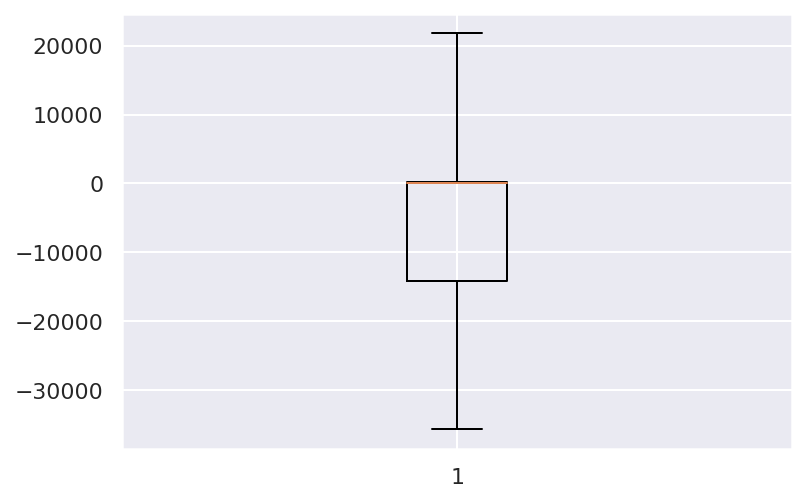

In [229]:
plt.boxplot(orig_swf.wait_time - out_swf.wait_time, showfliers=False)

In [208]:
df = pd.DataFrame(index=stats.keys(), data=stats.values())
df.index = pd.to_timedelta(df.index, unit='s')
df

,utilization,offered_load,slowdown,makespan,bsld
6 days 13:15:29,0.007812,0.007812,0.000000,0,0.000000
6 days 13:18:10,0.015625,0.015625,0.000000,0,0.000000
6 days 13:35:14,0.078125,0.078125,0.000000,0,0.000000
6 days 14:39:24,0.328125,0.328125,0.000000,0,0.000000
6 days 15:31:34,0.382812,0.382812,0.000000,0,0.000000
...,...,...,...,...,...
735 days 21:03:32,0.648438,0.648438,114.037021,63579812,109.975654
735 days 21:03:34,0.617188,0.617188,114.038802,63579814,109.977510
735 days 21:03:36,0.585938,0.585938,114.041284,63579816,109.980067
735 days 21:03:40,0.578125,0.578125,114.044179,63579820,109.983037


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


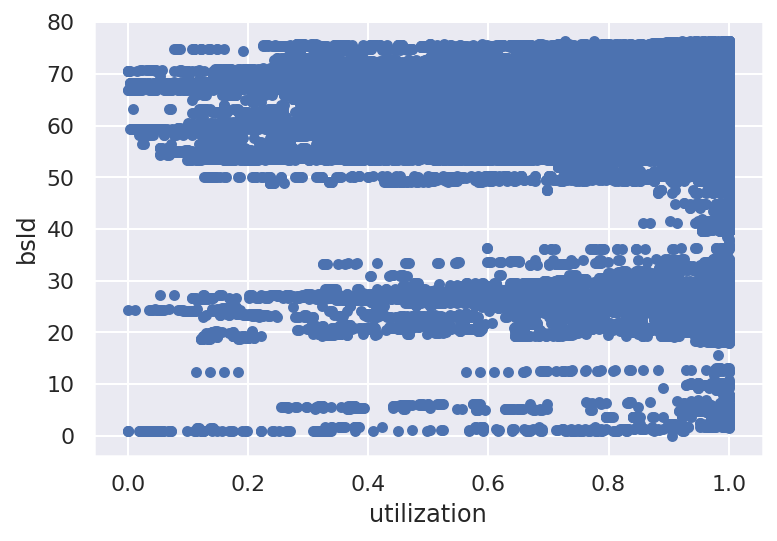

In [150]:
df.plot.scatter(x='utilization', y='bsld')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


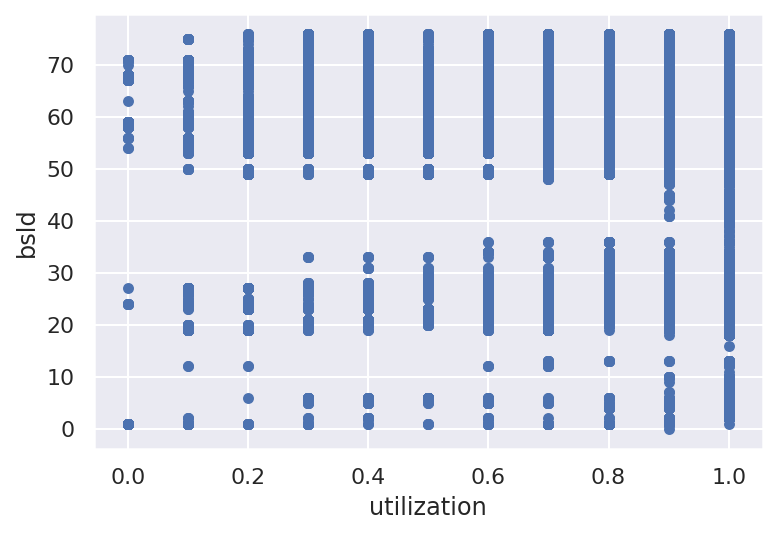

In [165]:
df2 = df
df2['utilization'] = df2['utilization'].round(1)
df2['bsld'] = df2['bsld'].round()
df.plot.scatter(x='utilization', y='bsld')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


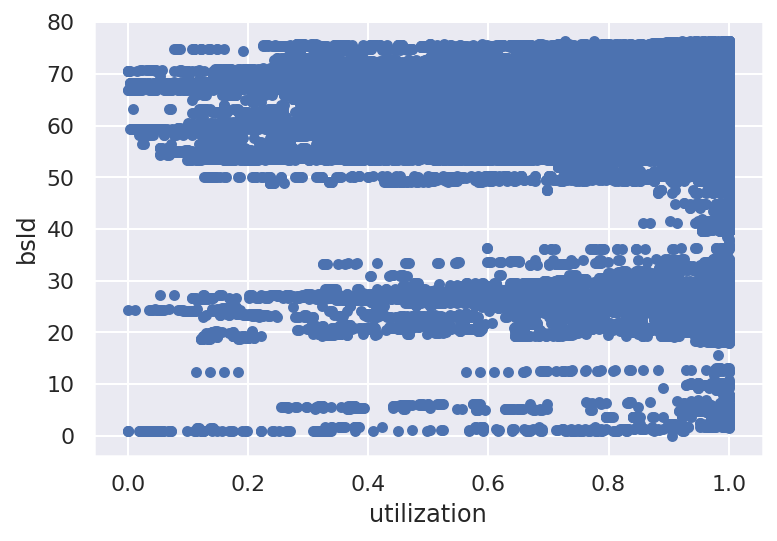

In [151]:
df.plot.scatter(x='utilization', y='bsld')

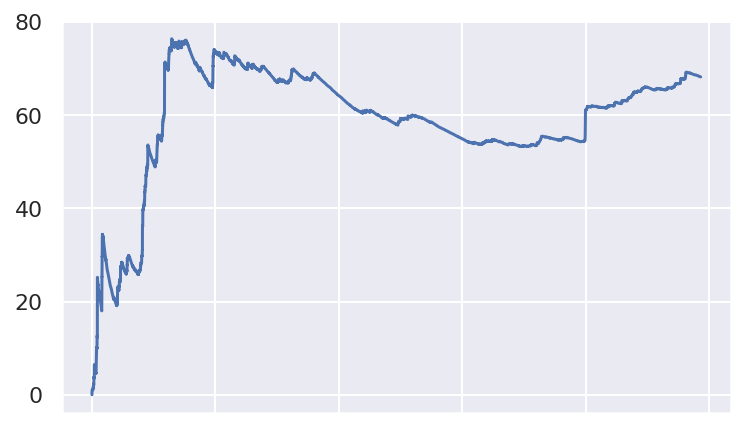

In [152]:
df['bsld'].rolling(1).mean().plot()

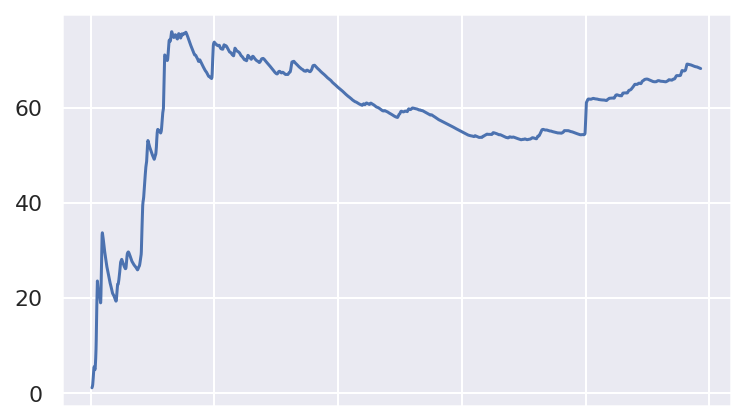

In [153]:
df['bsld'].rolling(200).mean().plot()

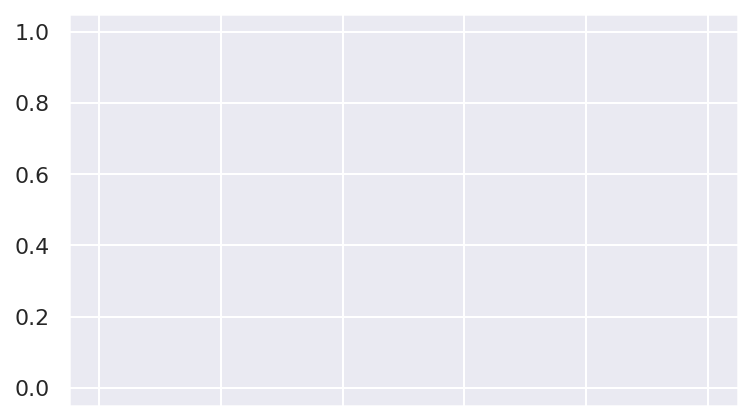

In [154]:
a = df['bsld'].rolling(1).mean()
a[abs(a.index - datetime.timedelta(days=550)).argmin():abs(a.index - datetime.timedelta(days=580)).argmin()].plot()

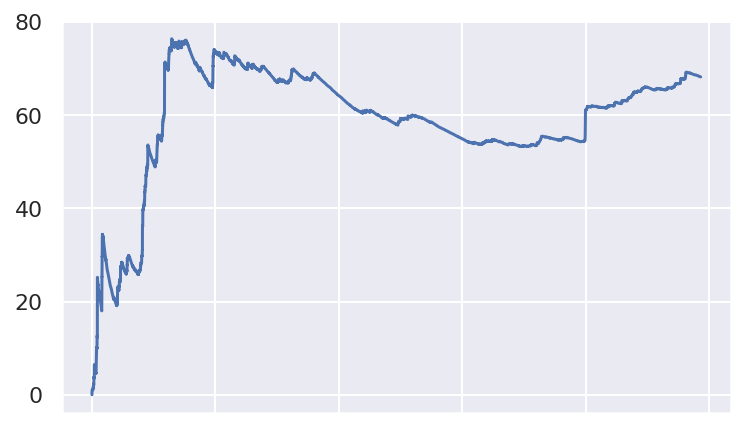

In [155]:
df['bsld'].rolling(1).mean().plot()

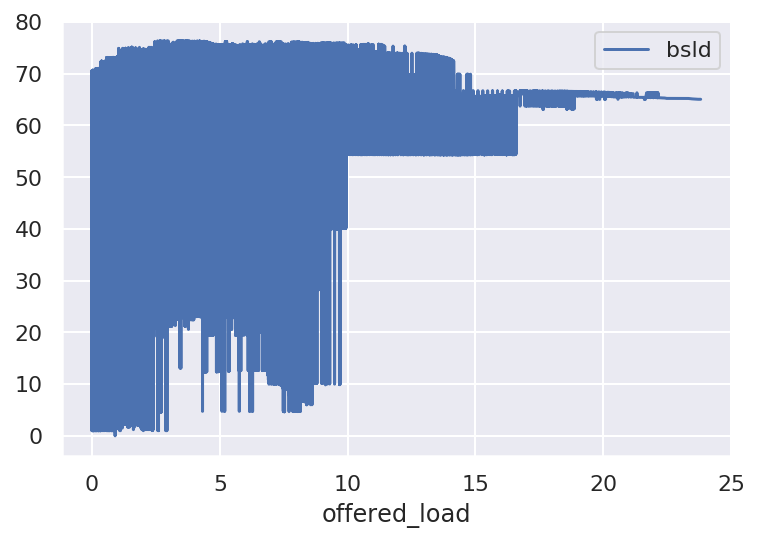

In [156]:
df['offered_load bsld'.split()].sort_values(by='offered_load').plot(x='offered_load', y='bsld')

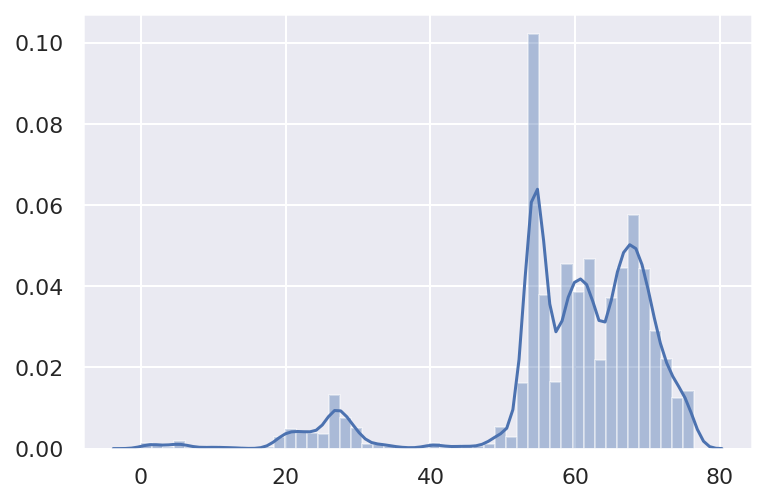

In [157]:
sns.distplot(df['bsld'.split()])

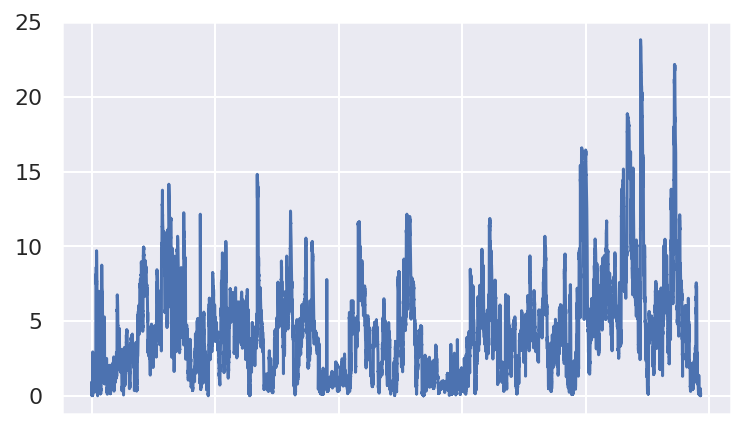

In [158]:
df['offered_load'].plot()